In [48]:
#importing neccessary libraries for eda
import numpy as np
import pandas as pd 
import sklearn 
import os
import matplotlib.pyplot as plt
import zipfile
import tqdm 
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import scipy


## reading the data


In [49]:
train_data=pd.read_csv('/content/drive/MyDrive/train_s3TEQDk.csv')

##  EDA (Exploratory Data Analysis)¶

In [50]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [51]:
train_data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [52]:
train_data.shape

(245725, 11)

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


### Target class distribution

In [54]:
train_data['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

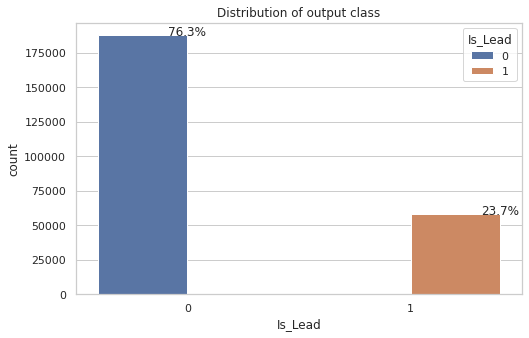

In [55]:
ax=sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_data))
ax = sns.countplot(x="Is_Lead", hue="Is_Lead", data=train_data)
plt.title("Distribution of output class")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### 
Duplicate checks

In [56]:
print("Number of duplicate in train dataset : {} ".format(sum(train_data.duplicated())))

Number of duplicate in train dataset : 0 


In [57]:
print("We have {} NaN/Null values in train dataset ".format(train_data.isnull().values.sum()))


We have 29325 NaN/Null values in train dataset 


* There is a large number of NaN/Null values are present in both train dataset since  large in count dropping the row is not good because we are reducing actual data in a large amount.
* We want to consider some imputation method to fill the values.

In [58]:
print(train_data.isna().sum())

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64


### Handling missing values

In [59]:
train_data['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [60]:
#train_data['Credit_Product'].fillna(train_data['Credit_Product'].mode()[0], inplace=True) #Mode based imputation
train_data['Credit_Product'].fillna("yn", inplace=True) # Make Null/Nan value as seperate category
#train_data.dropna(axis = 1, how ='all', inplace = True)# dropping the null values

In [61]:
print(train_data.isna().sum())

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64


### 
Plotting Based Analysis

In [62]:
train_data.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              3
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

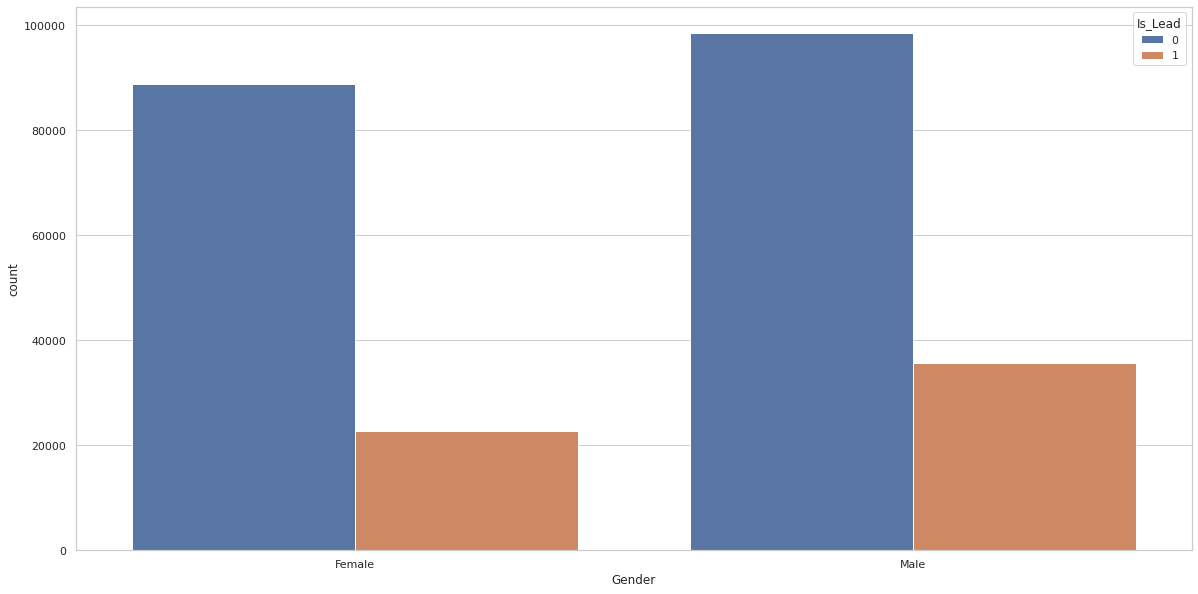

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(x='Gender',hue='Is_Lead',data=train_data)

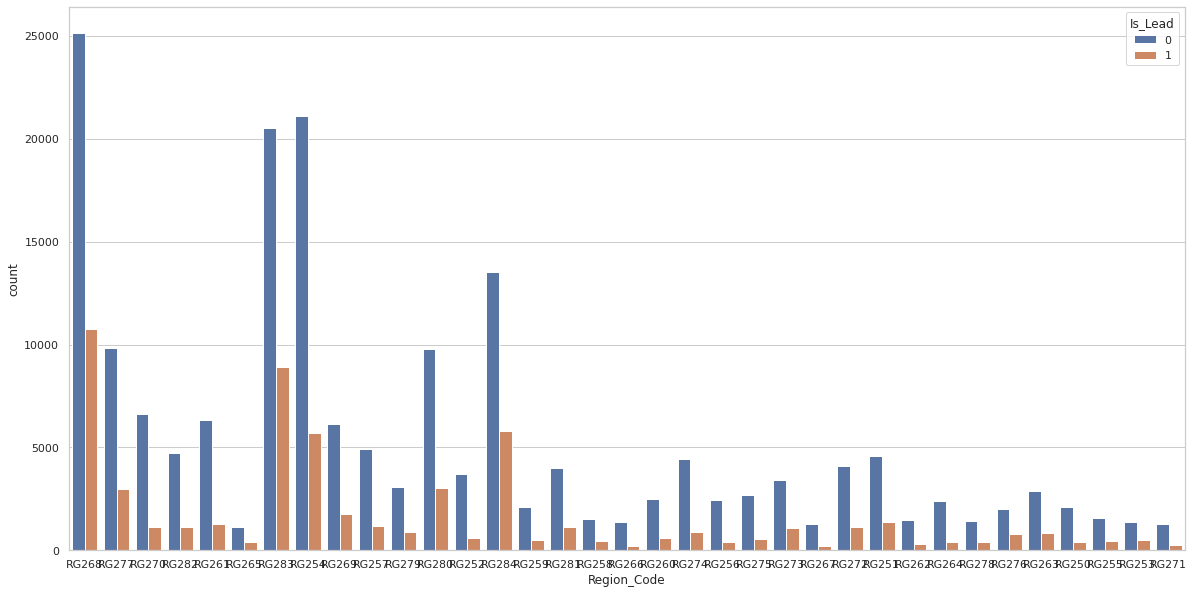

In [64]:
plt.figure(figsize=(20,10))
sns.countplot(x='Region_Code',hue='Is_Lead',data=train_data)

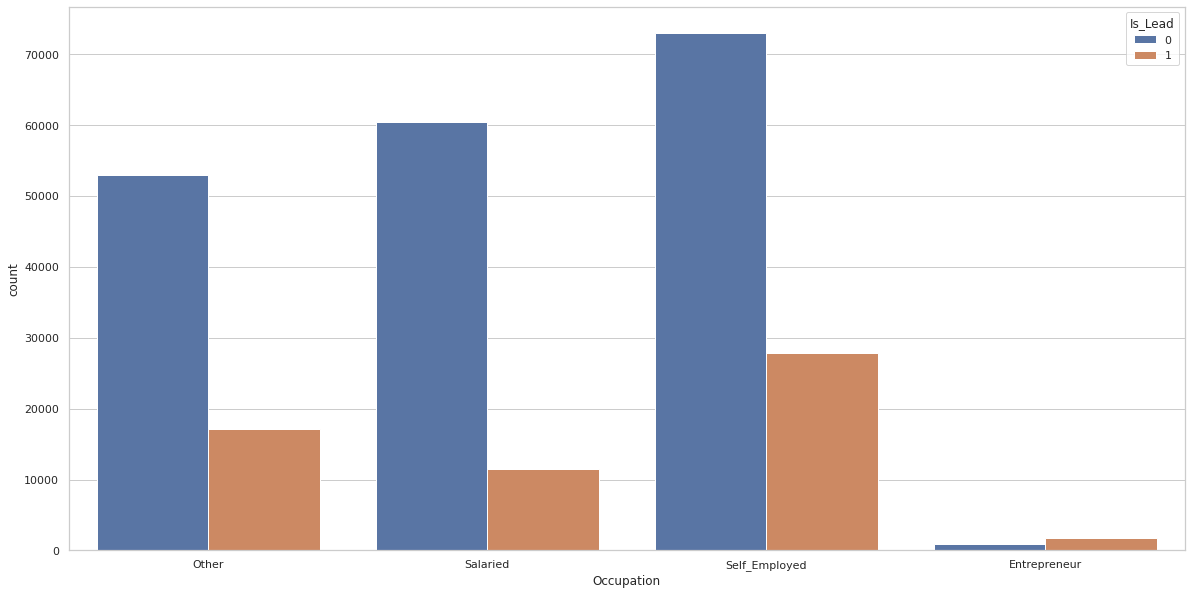

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(x='Occupation',hue='Is_Lead',data=train_data)

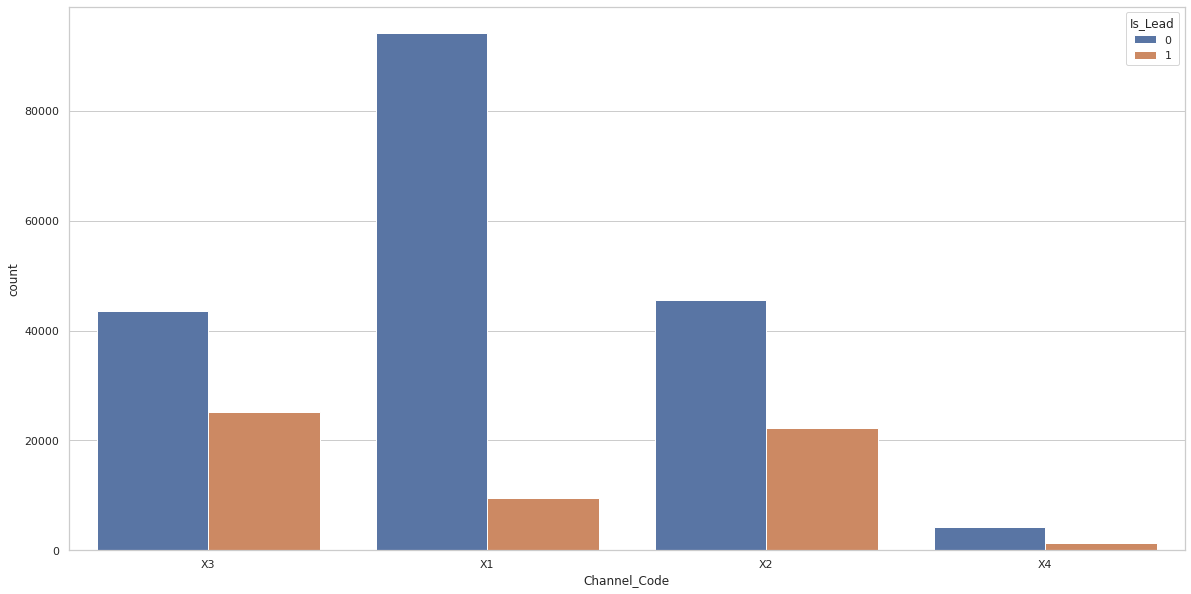

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(x='Channel_Code',hue='Is_Lead',data=train_data)

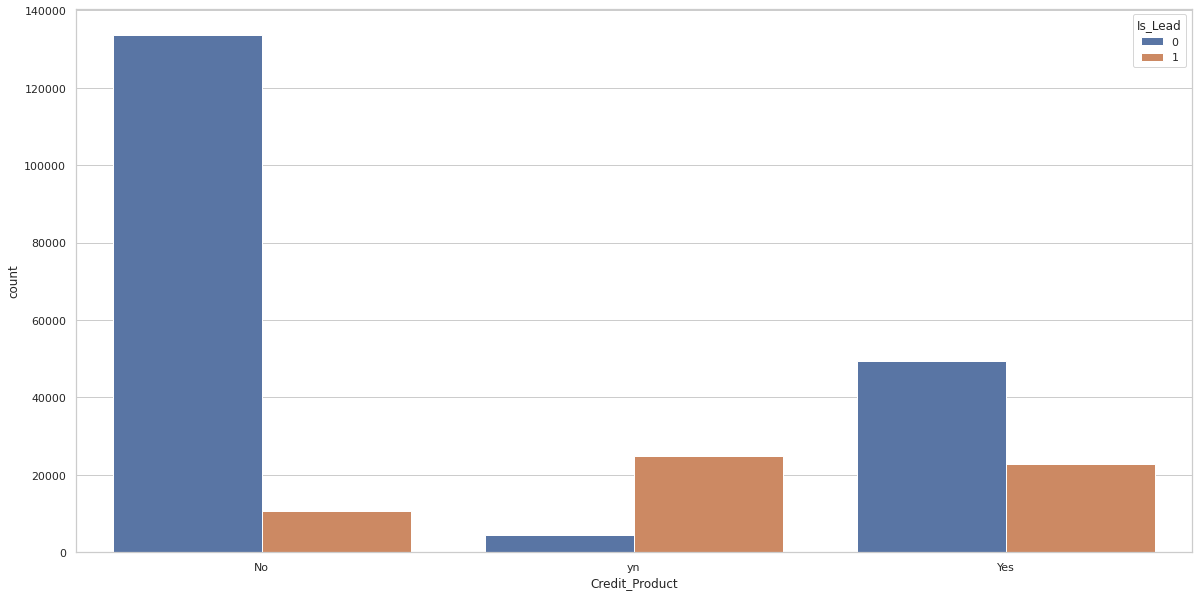

In [67]:
plt.figure(figsize=(20,10))
sns.countplot(x='Credit_Product',hue='Is_Lead',data=train_data)

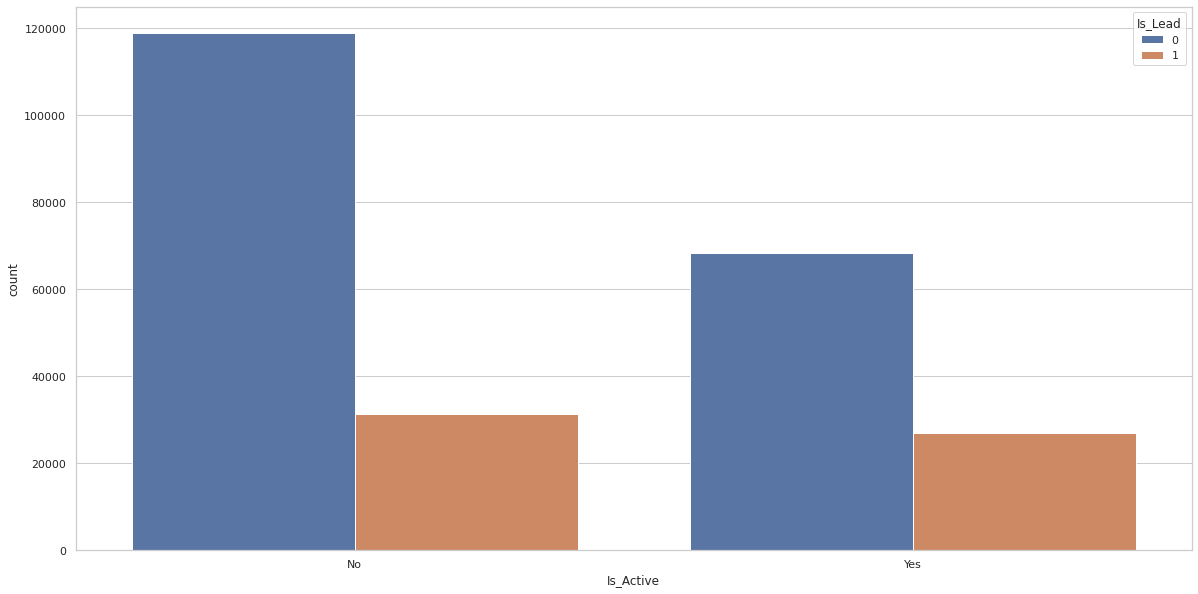

In [68]:
plt.figure(figsize=(20,10))
sns.countplot(x='Is_Active',hue='Is_Lead',data=train_data)

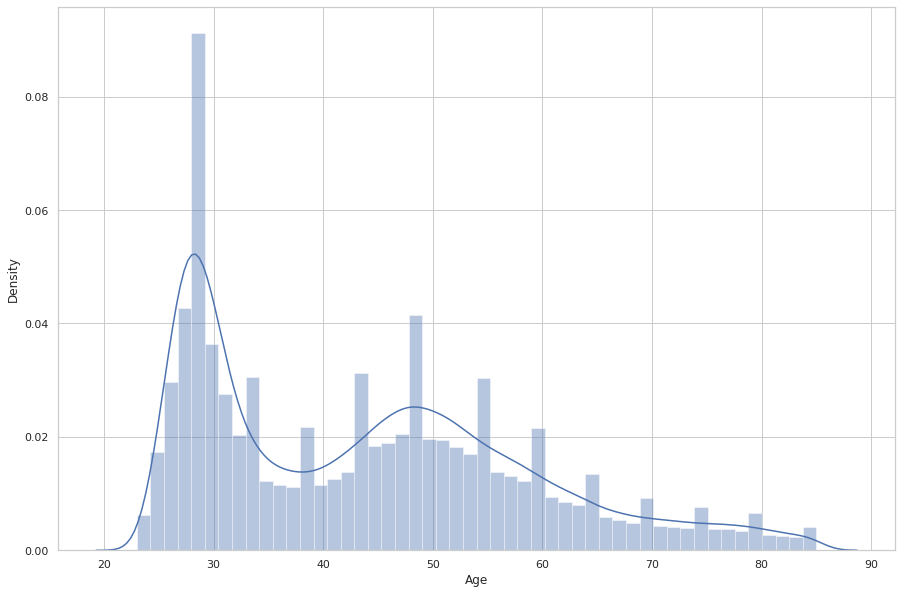

In [69]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Age'], label='Train data')

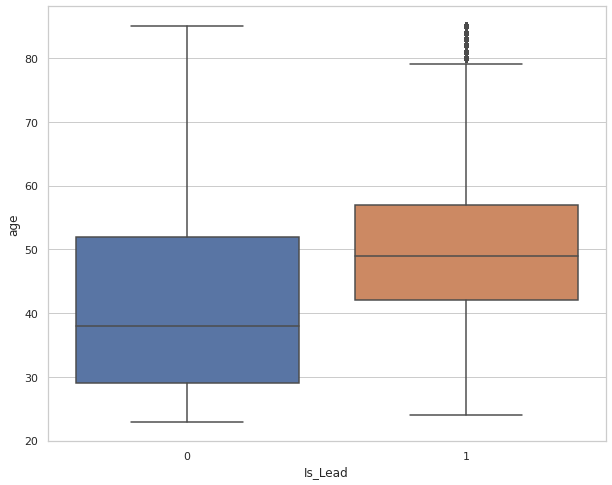

In [70]:

plt.figure(figsize=(10,8))
sns.boxplot(x='Is_Lead', y='Age', data=train_data)
plt.ylabel("age", fontsize=12)
plt.xlabel("Is_Lead", fontsize=12)
plt.show()

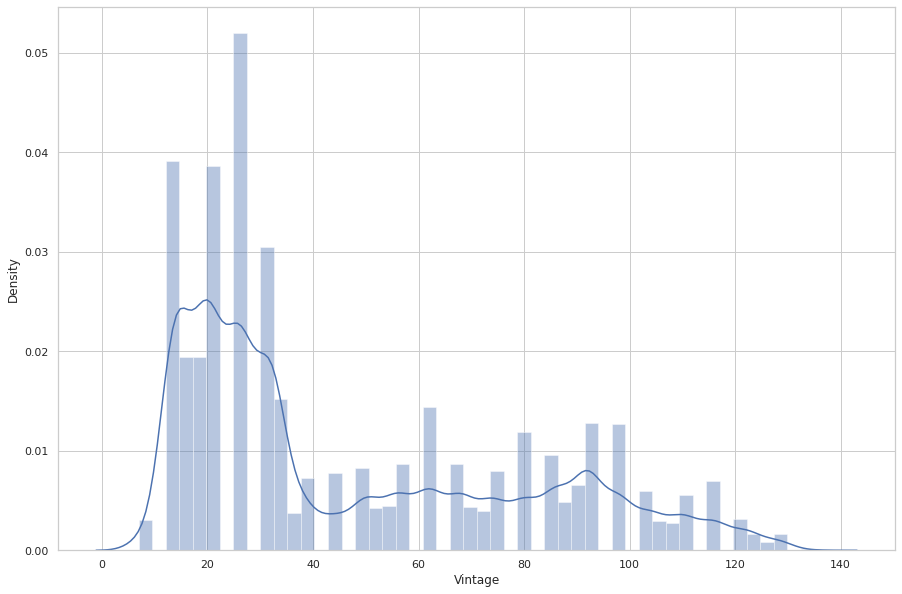

In [71]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Vintage'], label='Train data')

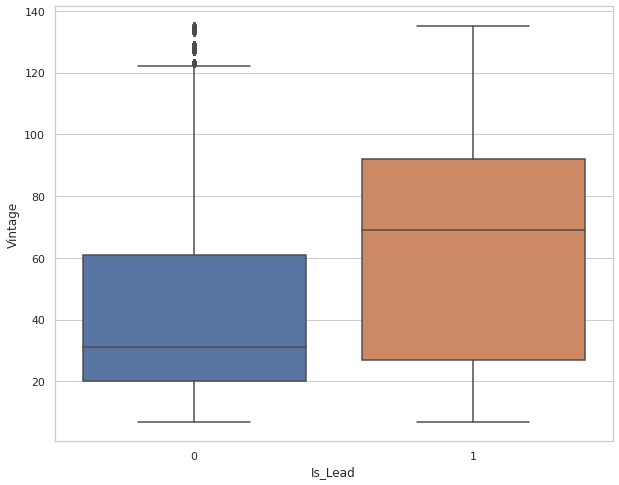

In [72]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Is_Lead', y='Vintage', data=train_data)
plt.ylabel("Vintage", fontsize=12)
plt.xlabel("Is_Lead", fontsize=12)
plt.show()

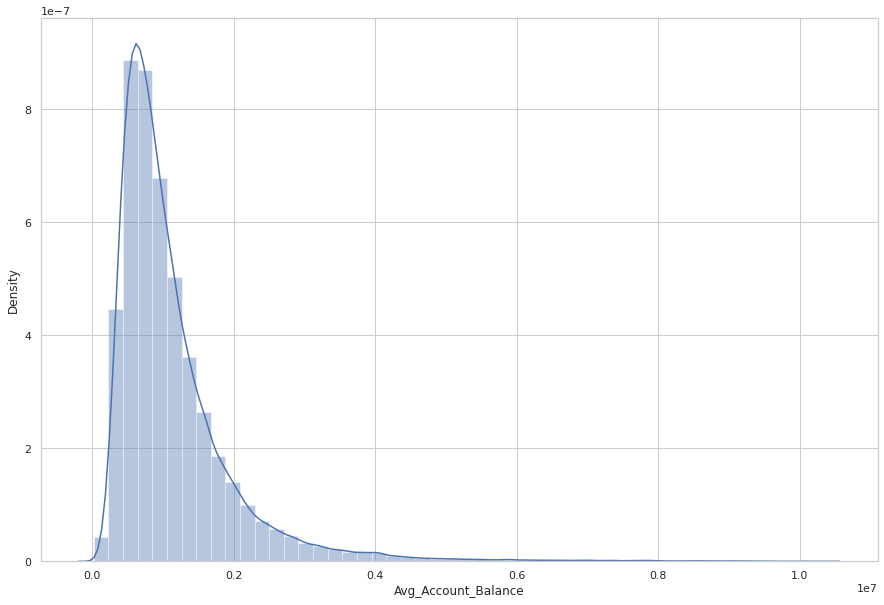

In [73]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Avg_Account_Balance'], label='Train data')

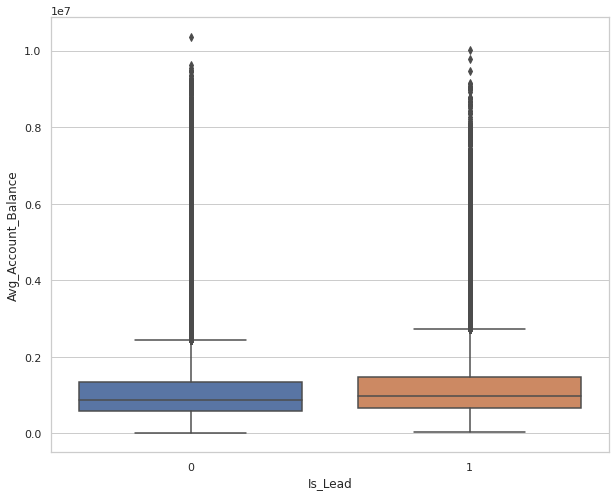

In [74]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Is_Lead', y='Avg_Account_Balance', data=train_data)
plt.ylabel("Avg_Account_Balance", fontsize=12)
plt.xlabel("Is_Lead", fontsize=12)
plt.show()

In [75]:
def frequency_encoding(column_name,output_column_name,df):
    """ Frequency enoding for each categories in categorical features """
    fe_pol = (df.groupby(column_name).size()) / len(df)
    df[output_column_name] = df[column_name].apply(lambda x : fe_pol[x])

In [76]:
train_data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [77]:
from itertools import combinations

In [78]:
def feature_engineering(df):
    cat_features=[]
    
    #Interaction Feature (Combining 2 categorical features and performing frequency encoding)
    
    columns=['Gender', 'Region_Code', 'Occupation', 'Channel_Code',
        'Credit_Product', 'Is_Active']

    comb = combinations(columns, 2) 

    for i in list(comb):  
        df[f'{i[0]}_{i[1]}']=df[i[0]].astype(str)+'_'+df[i[1]].astype(str)
        frequency_encoding(f'{i[0]}_{i[1]}',f'{i[0]}_{i[1]}',df)
        cat_features.append(f'{i[0]}_{i[1]}')
    
    #Frequency Encoding
    
    frequency_encoding('Region_Code','Region_Code_fe',df)
    frequency_encoding('Occupation','Occupation_fe',df)
    frequency_encoding('Channel_Code','Channel_Code_fe',df)
    
    
    #Deriving characteristics of each city by creating aggregate features
    
    region_aggregate_features = df.groupby(['Region_Code']).agg({'Age': ['mean', 'max', 'min','std'],
                                                     'Vintage': ['mean', 'max', 'min','std','sum'], 
                                                     'Avg_Account_Balance': ['mean', 'max', 'min','std','sum'], 
                                                     'Channel_Code': ['nunique','count'], 
                                                     'Occupation': ['nunique','count'],
                                                     })
    region_aggregate_features.columns = ['Region_aggregate_features' + '_'.join(c).strip('_') for c in region_aggregate_features.columns]
    df = pd.merge(df, region_aggregate_features, on = ['Region_Code'], how='left')

    #Deriving characteristics of each city and region combined by creating aggregate features
    
    region_channel_aggregate_features = df.groupby(['Region_Code','Channel_Code']).agg({'Age': ['mean', 'max', 'min','std'],
                                                     'Vintage': ['mean', 'max', 'min','std','sum'], 
                                                     'Avg_Account_Balance': ['mean', 'max', 'min','std','sum'], 
                                                     'Occupation': ['nunique','count'],
                                                     })
    region_channel_aggregate_features.columns = ['region_channel_aggregate_features' + '_'.join(c).strip('_') for c in region_channel_aggregate_features.columns]
    df = pd.merge(df, region_channel_aggregate_features, on = ['Region_Code','Channel_Code'], how='left')

     #Deriving characteristics of each city and Recommended policy category combined by creating aggregate features
        
    region_occupation_aggregate_features = df.groupby(['Region_Code','Occupation']).agg({'Age': ['mean', 'max', 'min','std'],
                                                     'Vintage': ['mean', 'max', 'min','std','sum'], 
                                                     'Avg_Account_Balance': ['mean', 'max', 'min','std','sum'], 
                                                     'Channel_Code': ['nunique','count'], 
                                                     })
    region_occupation_aggregate_features.columns = ['region_occupation_aggregate_features' + '_'.join(c).strip('_') for c in  region_occupation_aggregate_features.columns]
    df = pd.merge(df, region_occupation_aggregate_features, on = ['Region_Code','Occupation'], how='left')

    channel_occupation_aggregate_features = df.groupby(['Channel_Code','Occupation']).agg({'Age': ['mean', 'max', 'min','std'],
                                                     'Vintage': ['mean', 'max', 'min','std','sum'], 
                                                     'Avg_Account_Balance': ['mean', 'max', 'min','std','sum'], 
                                                     'Region_Code': ['nunique','count'], 
                                                     })
    channel_occupation_aggregate_features.columns = ['channel_occupation_aggregate_features' + '_'.join(c).strip('_') for c in  channel_occupation_aggregate_features.columns]
    df = pd.merge(df, channel_occupation_aggregate_features, on = ['Channel_Code','Occupation'], how='left')
    
     #Deriving characteristics of each city and Region_Code_Reco_Policy_Cat(interaction feature) combined by creating aggregate features


    
    occupation_aggregate_features = df.groupby(['Occupation']).agg({'Age': ['mean', 'max', 'min','std'],
                                                     'Vintage': ['mean', 'max', 'min','std','sum'], 
                                                     'Avg_Account_Balance': ['mean', 'max', 'min','std','sum'], 
                                                     'Channel_Code': ['nunique','count'], 
                                                     'Region_Code': ['nunique','count'],
                                                     })
    occupation_aggregate_features.columns = ['occupation_aggregate_features' + '_'.join(c).strip('_') for c in occupation_aggregate_features.columns]
    df = pd.merge(df,occupation_aggregate_features, on = ['Occupation'], how='left')
    
    #Deriving characteristics of Health Indicator by creating aggregate features
    
    
    for i in cat_features:
        df[f'region_{i}_max']=df.groupby('Region_Code')[i].transform('max')
        df[f'region_{i}_min']=df.groupby('Region_Code')[i].transform('min')
        df[f'region_{i}_mean']=df.groupby('Region_Code')[i].transform('mean')
        df[f'region_{i}_std']=df.groupby('Region_Code')[i].transform('std')

    
        df[f'channel_region_{i}_max']=df.groupby(['Region_Code','Channel_Code'])[i].transform('max')
        df[f'channel_region_{i}_min']=df.groupby(['Region_Code','Channel_Code'])[i].transform('min')
        df[f'channel_region_{i}_mean']=df.groupby(['Region_Code','Channel_Code'])[i].transform('mean')
        df[f'channel_region_{i}_std']=df.groupby(['Region_Code','Channel_Code'])[i].transform('std')

    
        df[f'region_occupation_{i}_max']=df.groupby(['Region_Code','Occupation'])[i].transform('max')
        df[f'region_occupation_{i}_min']=df.groupby(['Region_Code','Occupation'])[i].transform('min')
        df[f'region_occupation_{i}_mean']=df.groupby(['Region_Code','Occupation'])[i].transform('mean')
        df[f'region_occupation_{i}_std']=df.groupby(['Region_Code','Occupation'])[i].transform('std')
        
    return df,cat_features

In [79]:
data,cat=feature_engineering(train_data)

In [80]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Gender_Region_Code,Gender_Occupation,Gender_Channel_Code,Gender_Credit_Product,Gender_Is_Active,Region_Code_Occupation,Region_Code_Channel_Code,Region_Code_Credit_Product,Region_Code_Is_Active,Occupation_Channel_Code,Occupation_Credit_Product,Occupation_Is_Active,Channel_Code_Credit_Product,Channel_Code_Is_Active,Credit_Product_Is_Active,Region_Code_fe,Occupation_fe,Channel_Code_fe,Region_aggregate_featuresAge_mean,Region_aggregate_featuresAge_max,Region_aggregate_featuresAge_min,Region_aggregate_featuresAge_std,Region_aggregate_featuresVintage_mean,Region_aggregate_featuresVintage_max,Region_aggregate_featuresVintage_min,Region_aggregate_featuresVintage_std,Region_aggregate_featuresVintage_sum,Region_aggregate_featuresAvg_Account_Balance_mean,Region_aggregate_featuresAvg_Account_Balance_max,...,region_occupation_Occupation_Is_Active_max,region_occupation_Occupation_Is_Active_min,region_occupation_Occupation_Is_Active_mean,region_occupation_Occupation_Is_Active_std,region_Channel_Code_Credit_Product_max,region_Channel_Code_Credit_Product_min,region_Channel_Code_Credit_Product_mean,region_Channel_Code_Credit_Product_std,channel_region_Channel_Code_Credit_Product_max,channel_region_Channel_Code_Credit_Product_min,channel_region_Channel_Code_Credit_Product_mean,channel_region_Channel_Code_Credit_Product_std,region_occupation_Channel_Code_Credit_Product_max,region_occupation_Channel_Code_Credit_Product_min,region_occupation_Channel_Code_Credit_Product_mean,region_occupation_Channel_Code_Credit_Product_std,region_Channel_Code_Is_Active_max,region_Channel_Code_Is_Active_min,region_Channel_Code_Is_Active_mean,region_Channel_Code_Is_Active_std,channel_region_Channel_Code_Is_Active_max,channel_region_Channel_Code_Is_Active_min,channel_region_Channel_Code_Is_Active_mean,channel_region_Channel_Code_Is_Active_std,region_occupation_Channel_Code_Is_Active_max,region_occupation_Channel_Code_Is_Active_min,region_occupation_Channel_Code_Is_Active_mean,region_occupation_Channel_Code_Is_Active_std,region_Credit_Product_Is_Active_max,region_Credit_Product_Is_Active_min,region_Credit_Product_Is_Active_mean,region_Credit_Product_Is_Active_std,channel_region_Credit_Product_Is_Active_max,channel_region_Credit_Product_Is_Active_min,channel_region_Credit_Product_Is_Active_mean,channel_region_Credit_Product_Is_Active_std,region_occupation_Credit_Product_Is_Active_max,region_occupation_Credit_Product_Is_Active_min,region_occupation_Credit_Product_Is_Active_mean,region_occupation_Credit_Product_Is_Active_std
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,0.064641,0.123809,0.108866,0.285588,0.293177,0.046418,0.058875,0.072614,0.073704,0.104023,0.160444,0.168473,0.119170,0.137218,0.344971,0.146237,0.285575,0.27963,49.039322,85,24,14.180870,59.197918,135,7,34.140736,2127218,1.463900e+06,10352009,...,0.168473,0.117102,0.143643,0.025672,0.327264,0.002914,0.139173,0.094332,0.119170,0.055823,0.100342,0.023533,0.327264,0.002914,0.129918,0.086028,0.328473,0.010573,0.159308,0.074182,0.142411,0.137218,0.139873,0.002596,0.328473,0.010573,0.157747,0.069951,0.344971,0.056571,0.206823,0.096720,0.344971,0.056571,0.186078,0.097664,0.344971,0.056571,0.203047,0.095986
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,0.024011,0.160733,0.236911,0.285588,0.293177,0.018061,0.025240,0.032915,0.035475,0.256470,0.213340,0.225268,0.327264,0.328473,0.344971,0.052197,0.293006,0.42209,41.754249,85,24,14.094754,42.484874,129,7,29.971752,544911,9.832893e+05,9491986,...,0.225268,0.067738,0.202125,0.055775,0.327264,0.002914,0.188533,0.117127,0.327264,0.012445,0.285507,0.094803,0.327264,0.002914,0.263409,0.110264,0.328473,0.010573,0.213489,0.100412,0.328473,0.093617,0.298709,0.078137,0.328473,0.010573,0.282353,0.089970,0.344971,0.056571,0.247839,0.103321,0.344971,0.056571,0.306074,0.071406,0.344971,0.056571,0.291001,0.087355
2,HD3DSEMC,Female,56,RG268,Self_Employe

In [81]:
import pandas as pd
import numpy as np
from itertools import combinations

from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

import pickle 
from sklearn.externals import joblib 

import warnings
warnings.filterwarnings("ignore")

In [82]:
def label_encoder(df):
    """ Label encoding for categorical features"""
    le = LabelEncoder()
    for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Credit_Product', 'Is_Active']:
      df[col]=  df[col].astype('str') 
      df[col]= le.fit_transform(df[col])

    return df

In [83]:

df=label_encoder(data)

In [104]:
df.shape

(245725, 293)

In [92]:
x=df.drop(['ID','Is_Lead'],axis=1) #contain all  independent variable
y=df['Is_Lead']           #dependent variable

In [105]:

# splitting data
X_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.10,
                                                    random_state=0,shuffle=True)

In [126]:
params={'lambda': 2.8849054495567423, 
        'alpha': 0.001054193185317787, 
        'colsample_bytree': 0.5, 
        'subsample': 0.4, 
        'learning_rate': 0.014, 
        'max_depth': 13, 
        'random_state': 24,
        'min_child_weight': 5,
        }

In [124]:
#modelling
model = XGBClassifier(n_estimators=1000,**params,verbose= -1)
model.fit(X_train, y_train,eval_set=[(x_val, y_val)], early_stopping_rounds=30,verbose=False,eval_metric='auc')

XGBClassifier(alpha=0.001054193185317787, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              gamma=0, lambda=2.8849054495567423, learning_rate=0.014,
              max_delta_step=0, max_depth=13, min_child_weight=5, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=24, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=5, seed=None, silent=None,
              subsample=0.4, verbose=-1, verbosity=1)

In [125]:
#Performance Metric Evaluation
from sklearn.metrics import roc_auc_score,accuracy_score
y_predict=model.predict(x_val)
y_predict_prob =model.predict_proba(x_val)[:,1]
acc_xgb=accuracy_score(y_val,y_predict)
AUC_xgb=roc_auc_score(y_val,y_predict_prob)
print('VALIDATION DATASET\n')
print('Accuracy Score:',acc_xgb)
print('\n')
print("ROC_AUC Score:",AUC_xgb)

VALIDATION DATASET

Accuracy Score: 0.7958328246449355


ROC_AUC Score: 0.8722997272090984


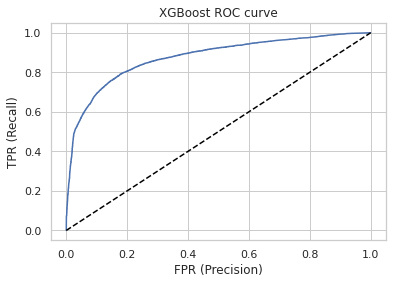

In [117]:
#ROC curve
fpr, tpr, _ = roc_curve(y_val, y_predict_prob )

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [111]:
joblib.dump(model, 'xgb1.pkl') # saving xgb classifier

['xgb1.pkl']